In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
new_model = tf.keras.models.load_model('model-arabika.h5')


TRAINING_FILE = 'C:\\Users\\__VivoBook__\\Downloads/coffee beans detection test.v5i.tensorflow/train/_annotations.csv'
VALIDATION_FILE = 'C:\\Users\\__VivoBook__\\Downloads/coffee beans detection test.v5i.tensorflow/valid/_annotations.csv'
TEST_FILE = 'C:\\Users\\__VivoBook__\\Downloads/coffee beans detection test.v5i.tensorflow/test/_annotations.csv'

def parse_data_from_input(filename):
    dataframe = pd.read_csv(filename)
    label_mapping = {'arabika': 0, 'robusta': 1, 'liberika' : 2}
    dataframe['class'] = dataframe['class'].map(label_mapping)

    images = []
    labels = []

    for _, row in dataframe.iterrows():
        image_filename = row['filename']
        image_path = os.path.join(os.path.dirname(filename), image_filename)
        image = cv2.imread(image_path)

        x_min = row['xmin']
        y_min = row['ymin']
        x_max = row['xmax']
        y_max = row['ymax']

        cropped_image = image[y_min:y_max, x_min:x_max]
        resized_image = cv2.resize(cropped_image, (224, 224))
        reshaped_image = np.expand_dims(resized_image, axis=0)
        images.append(reshaped_image)
        labels.append(row['class'])

    images = np.concatenate(images, axis=0)
    labels = np.array(labels)

    unique_labels = np.unique(labels)
    print("Unique labels:", unique_labels)
    print("Sample images:", images[:5])

    return images, labels

training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)
test_images, test_labels = parse_data_from_input(TEST_FILE)

#normalization
training_images = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

train_loss, train_acc = new_model.evaluate(training_images, training_labels)
val_loss, val_acc = new_model.evaluate(validation_images, validation_labels)
test_loss, test_acc = new_model.evaluate(test_images, test_labels)
print(f'val_loss: {val_loss}, val_acc: {val_acc}')
print(f'test_loss: {test_loss}, test_acc: {test_acc}')
print(f'train_loss: {train_loss}, train_acc: {train_acc}')

Unique labels: [0 1 2]
Sample images: [[[[220 226 225]
   [220 226 225]
   [220 226 225]
   ...
   [224 229 228]
   [225 230 229]
   [225 230 229]]

  [[220 226 225]
   [220 226 225]
   [220 226 225]
   ...
   [224 229 228]
   [225 230 229]
   [225 230 229]]

  [[220 226 224]
   [220 226 224]
   [220 226 224]
   ...
   [224 228 228]
   [225 230 229]
   [225 230 229]]

  ...

  [[174 188 186]
   [174 188 186]
   [173 187 185]
   ...
   [204 212 211]
   [205 213 212]
   [205 213 212]]

  [[174 188 186]
   [174 188 186]
   [173 187 185]
   ...
   [204 212 211]
   [205 213 212]
   [205 213 212]]

  [[174 188 186]
   [174 188 186]
   [173 187 185]
   ...
   [204 212 211]
   [205 213 212]
   [205 213 212]]]


 [[[213 221 221]
   [213 221 221]
   [213 221 221]
   ...
   [220 225 226]
   [220 225 226]
   [220 225 226]]

  [[213 221 221]
   [213 221 221]
   [213 221 221]
   ...
   [220 225 226]
   [220 225 226]
   [220 225 226]]

  [[213 221 221]
   [213 221 221]
   [213 221 221]
   ...
   [220

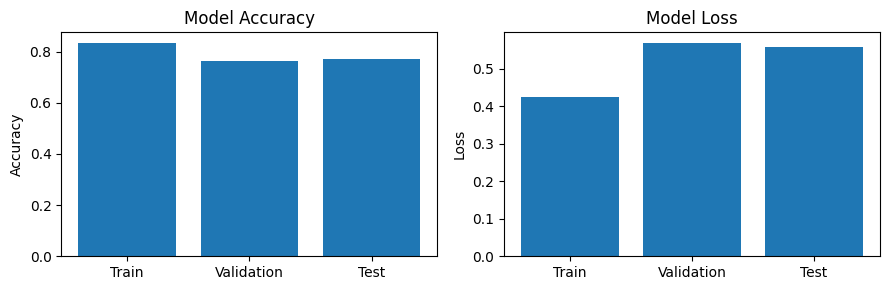

In [2]:
import matplotlib.pyplot as plt

# Accuracy comparison
plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.bar(['Train', 'Validation', 'Test'], [train_acc, val_acc, test_acc])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

# Loss comparison
plt.subplot(122)
plt.bar(['Train', 'Validation', 'Test'], [train_loss, val_loss, test_loss])
plt.title('Model Loss')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 241ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_021557_jpg.rf.c58b326d3b482bfdb69033fcc6c9ac15.jpg is Robusta bean.
[[0.01513157 0.97523797 0.00963043]]


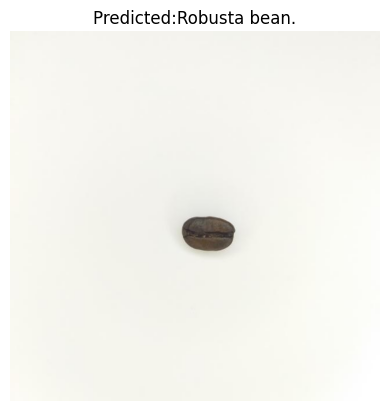

1/1 [==============================] - 0s 293ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_021631_jpg.rf.eed3d0a8861f0ddb25db5a69516da230.jpg is Robusta bean.
[[0.07936296 0.8748645  0.0457725 ]]


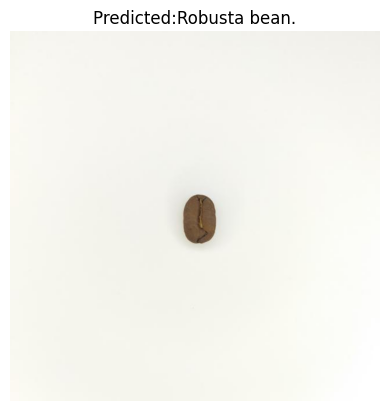

1/1 [==============================] - 0s 278ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_021653_jpg.rf.a9d6cd472000026565d0de0db65018e2.jpg is Robusta bean.
[[0.01990984 0.96058905 0.01950117]]


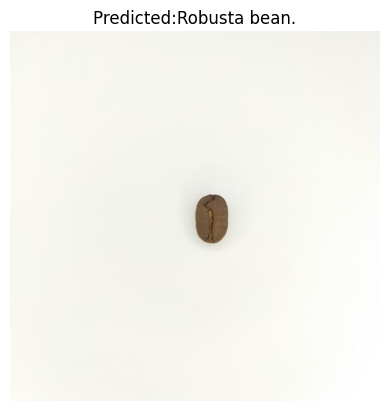

1/1 [==============================] - 0s 247ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_022032_jpg.rf.5971ef33f9584faa96b4af5bf1e6fc98.jpg is Robusta bean.
[[0.04787941 0.93618596 0.01593461]]


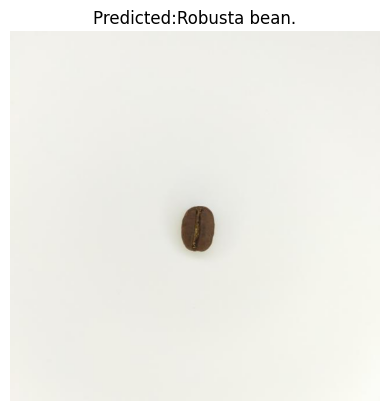

1/1 [==============================] - 0s 227ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_022408_jpg.rf.6556fad72dc19c47579f3d3d3da797af.jpg is Robusta bean.
[[0.0031713  0.99519914 0.00162964]]


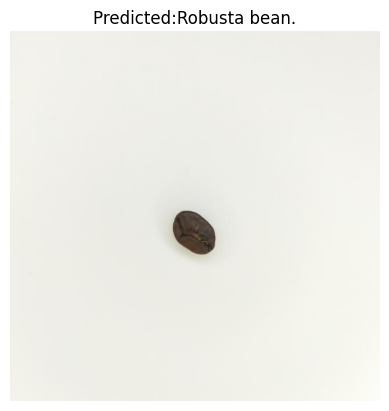

1/1 [==============================] - 0s 303ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_022525_jpg.rf.bb7257a0871fefaaf752c3f464de6554.jpg is Robusta bean.
[[0.00261855 0.99342316 0.00395833]]


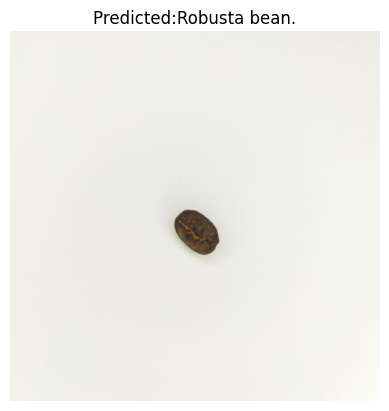

1/1 [==============================] - 0s 297ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_022624_jpg.rf.4e861ab8d32f13b169560049b2f34711.jpg is Robusta bean.
[[0.01191807 0.9840464  0.00403548]]


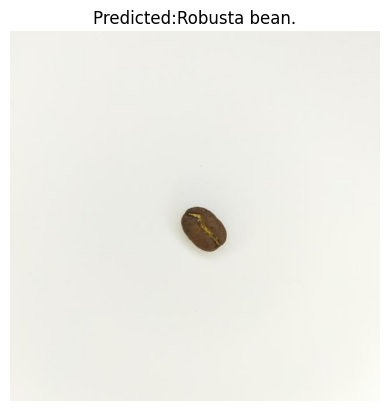

1/1 [==============================] - 0s 263ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_023942_jpg.rf.328f9d07251e13f13ef5cbba573b474e.jpg is Robusta bean.
[[0.00670366 0.98614013 0.00715619]]


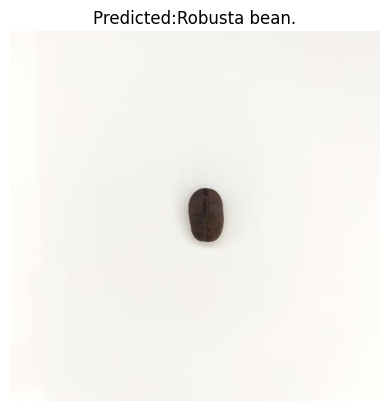

1/1 [==============================] - 0s 246ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_024348_jpg.rf.dd345cf7437d1fbfeae44cce1a77c652.jpg is Robusta bean.
[[0.00207951 0.9953485  0.00257192]]


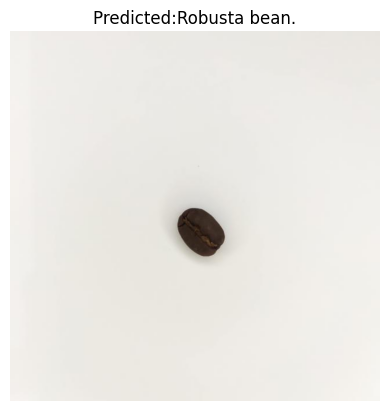

1/1 [==============================] - 0s 255ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_024423_jpg.rf.3f0566245e08a388cc396e1865717004.jpg is Robusta bean.
[[0.00398462 0.99272364 0.00329181]]


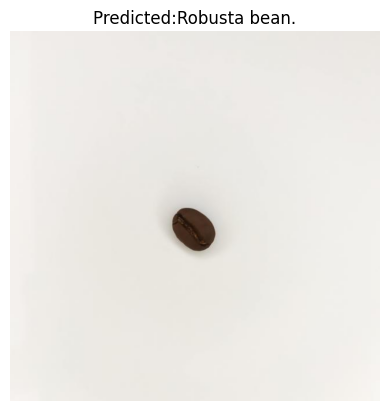

1/1 [==============================] - 0s 241ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_025333_jpg.rf.6d6bffbc593903336344090c4912250f.jpg is Robusta bean.
[[0.13355389 0.8302952  0.03615081]]


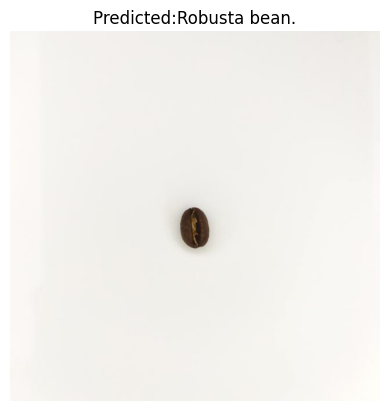

1/1 [==============================] - 0s 267ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_025432_jpg.rf.307faf533ae7a359fe03640969648168.jpg is Robusta bean.
[[0.00389751 0.9936698  0.00243272]]


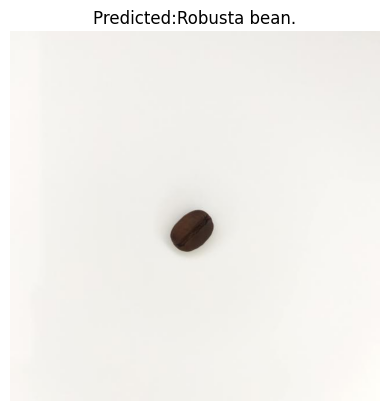

1/1 [==============================] - 0s 257ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_122827_jpg.rf.8f6522ef42237ec3dccb6bcdc971a24c.jpg is Robusta bean.
[[0.0053029  0.99216545 0.00253167]]


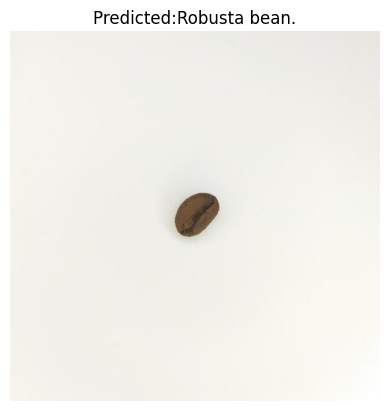

1/1 [==============================] - 0s 267ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_123033_jpg.rf.1974605b770719ed6ef0cdd0e61f715e.jpg is Robusta bean.
[[0.02219317 0.9669466  0.01086016]]


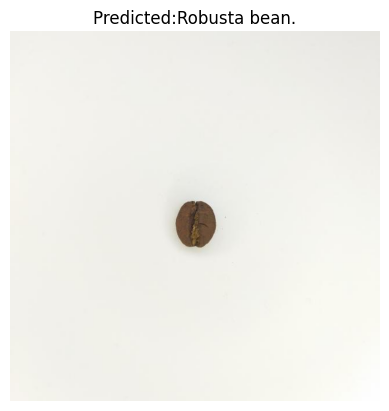

1/1 [==============================] - 0s 254ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_123317_jpg.rf.ea912a491d14988aeedfc34559b8cc12.jpg is Robusta bean.
[[0.01275978 0.9776235  0.00961665]]


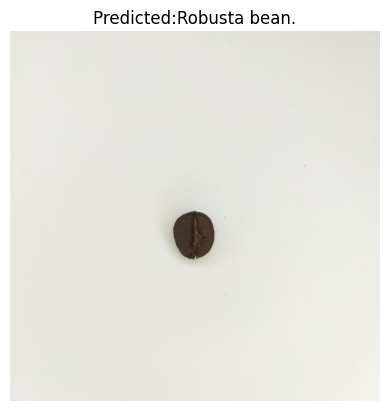

1/1 [==============================] - 0s 313ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_123900_jpg.rf.4b6fdecb5c1445b144ac206ea5a58e0e.jpg is Robusta bean.
[[0.00476757 0.9915611  0.00367127]]


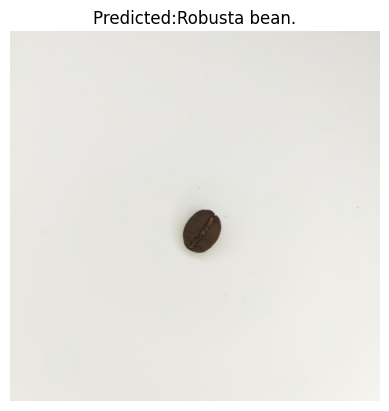

1/1 [==============================] - 0s 221ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_124244_jpg.rf.b25a6965cbb652bd01be0a2b2e96b73a.jpg is Robusta bean.
[[0.00824519 0.9867801  0.00497466]]


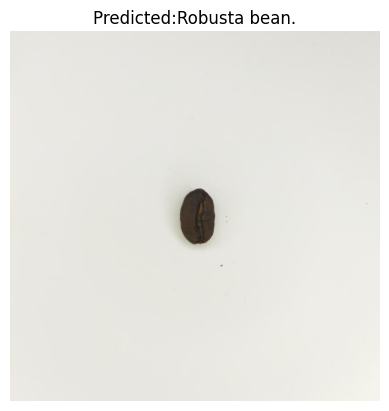

1/1 [==============================] - 0s 246ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_124510_jpg.rf.8a647902a3f49a1297f25ab1bed244d6.jpg is Robusta bean.
[[0.00503573 0.99314547 0.00181885]]


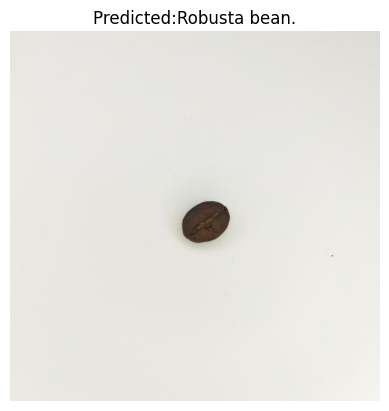

1/1 [==============================] - 0s 241ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_124811_jpg.rf.d928ba85f72343f3c155d09555dc70cd.jpg is Robusta bean.
[[0.02023018 0.97199875 0.00777099]]


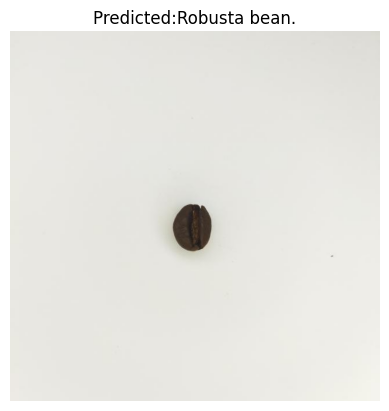

1/1 [==============================] - 0s 229ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_124930_jpg.rf.7b4dff9de136a7440d473d343e408850.jpg is Robusta bean.
[[0.0138178  0.9831009  0.00308128]]


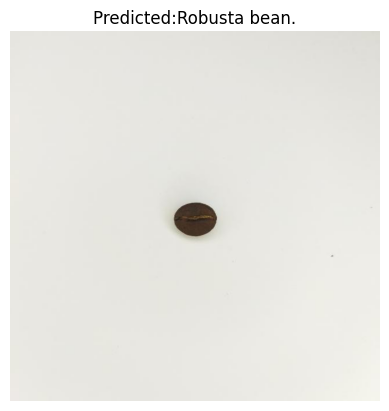

1/1 [==============================] - 0s 234ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_125055_jpg.rf.79887d1bd1f3727fbf0775897915dd4d.jpg is Robusta bean.
[[0.00344673 0.995141   0.00141232]]


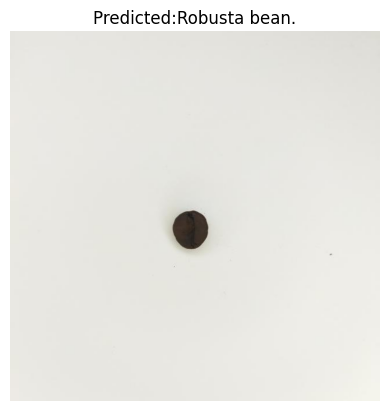

1/1 [==============================] - 0s 259ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_130210_jpg.rf.a43006584c35b243352565828b42c183.jpg is Robusta bean.
[[0.00498407 0.9875564  0.00745959]]


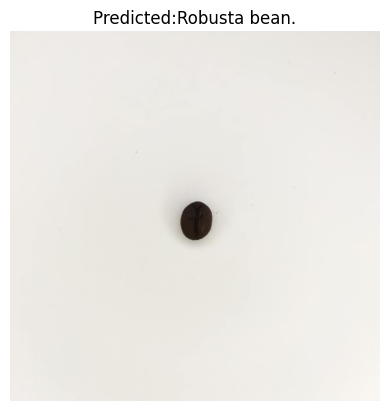

1/1 [==============================] - 0s 243ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_131407_jpg.rf.b752983c41a8e212713c4a95cc1b0019.jpg is Robusta bean.
[[0.00287272 0.9941508  0.00297642]]


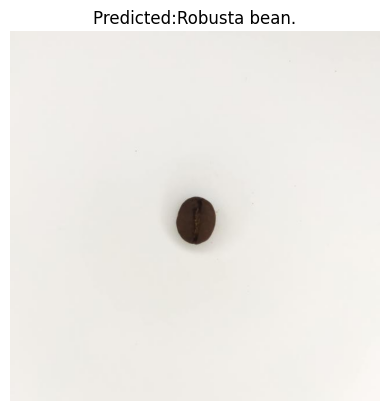

1/1 [==============================] - 0s 253ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_131817_jpg.rf.74d5c563a8d4d9c357754c37ec699787.jpg is Robusta bean.
[[0.01107935 0.98403674 0.00488397]]


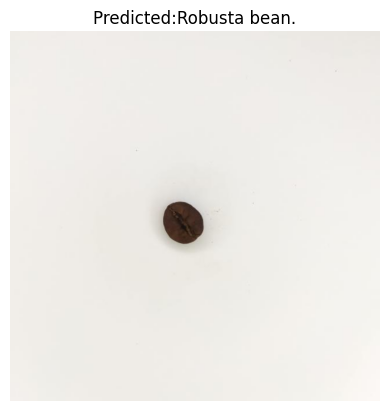

1/1 [==============================] - 0s 256ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_131955_jpg.rf.bf1e76220140f0accb22674eeb60e312.jpg is Robusta bean.
[[0.02871613 0.96181566 0.00946821]]


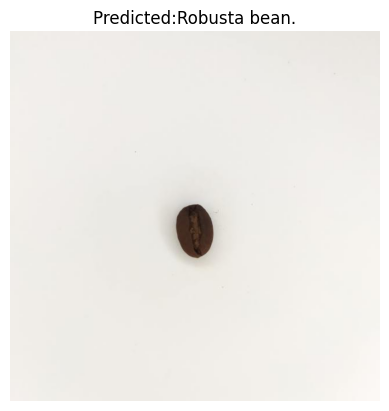

1/1 [==============================] - 0s 236ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230329_132200_jpg.rf.d1755033796a2d99e7813d8b2d286c68.jpg is Robusta bean.
[[0.00811319 0.9880469  0.0038399 ]]


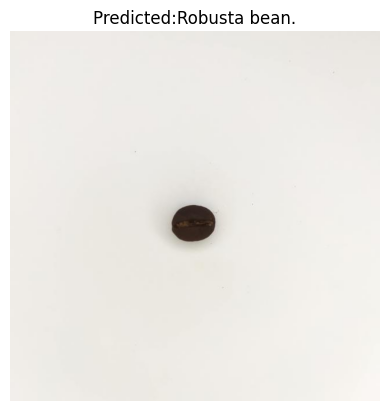

1/1 [==============================] - 0s 248ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230401_180141_jpg.rf.e939588f572a4cf7f326100fb06c42e7.jpg is Robusta bean.
[[0.17377976 0.8040561  0.0221642 ]]


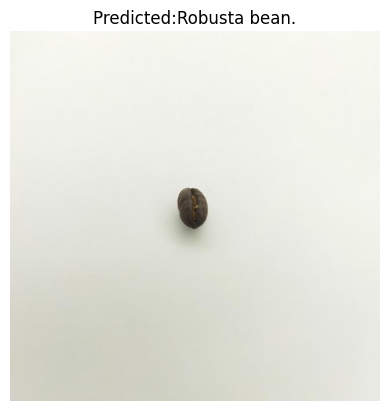

1/1 [==============================] - 0s 234ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230401_180255_jpg.rf.cede3cabb85967b6dea4f1211f9660e3.jpg is Robusta bean.
[[0.08942898 0.8351801  0.07539099]]


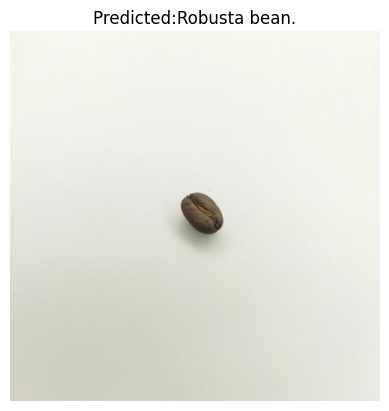

1/1 [==============================] - 0s 229ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230401_180342_jpg.rf.284d668d8a788ea76edd1f20c0d5f5ed.jpg is Robusta bean.
[[0.31126827 0.6097307  0.07900103]]


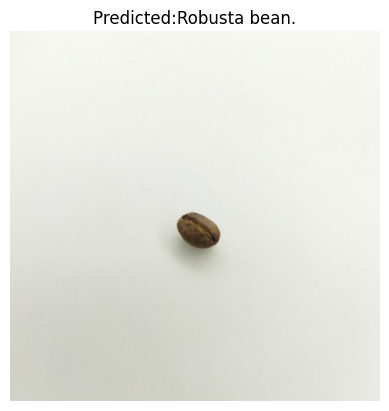

1/1 [==============================] - 0s 222ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230401_181359_jpg.rf.99b925cdb14dabee5f1e9a7098cf16f3.jpg is Robusta bean.
[[0.21668737 0.73379475 0.04951793]]


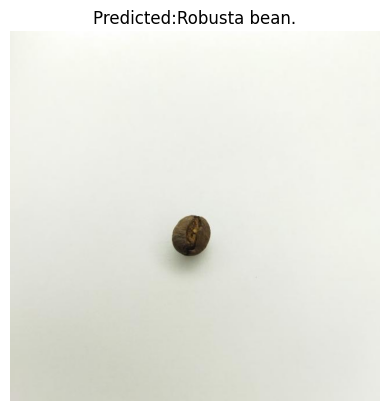

1/1 [==============================] - 0s 289ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230402_171029_jpg.rf.4b8e07f98caf3194451caf9d585f9df9.jpg is Robusta bean.
[[0.21099973 0.7672388  0.02176148]]


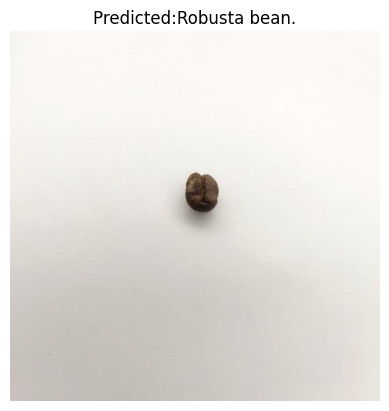

1/1 [==============================] - 0s 228ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230402_171342_jpg.rf.9e957b082eeb99d871bce6e84423e822.jpg is Robusta bean.
[[0.31159973 0.6510002  0.03740002]]


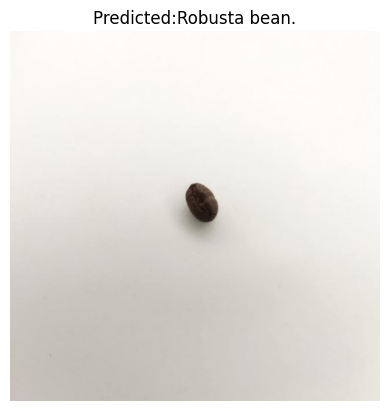

1/1 [==============================] - 0s 223ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230402_172413_jpg.rf.40f7e3895879a8b17f2cbb9117f48de0.jpg is Robusta bean.
[[0.36448994 0.575536   0.05997401]]


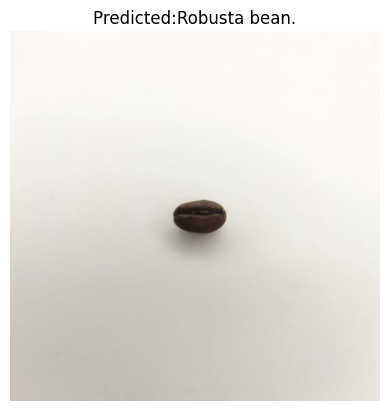

1/1 [==============================] - 0s 278ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_014603_jpg.rf.370157241262a34fbe3eaedea38c350a.jpg is Arabica bean.
[[0.5051956  0.4855934  0.00921091]]


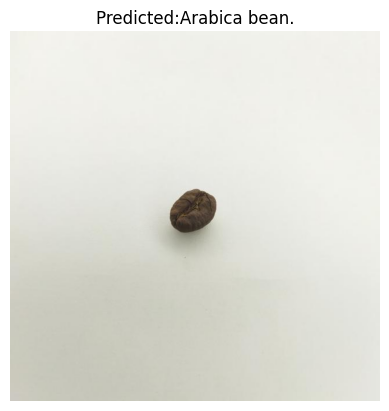

1/1 [==============================] - 0s 225ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_020020_jpg.rf.de84bcde07af175b63835c9665d7febb.jpg is Robusta bean.
[[0.46744636 0.47303614 0.05951753]]


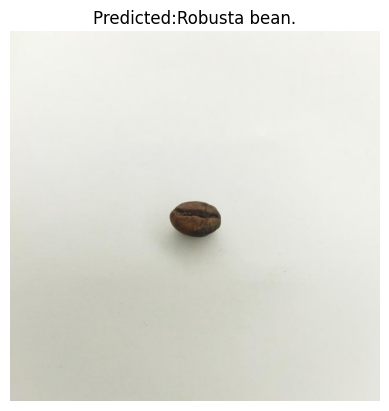

1/1 [==============================] - 0s 246ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_021034_jpg.rf.7b9cc1f4d9d0faa276b3027667cc7a3c.jpg is Robusta bean.
[[0.3116631  0.61949384 0.06884312]]


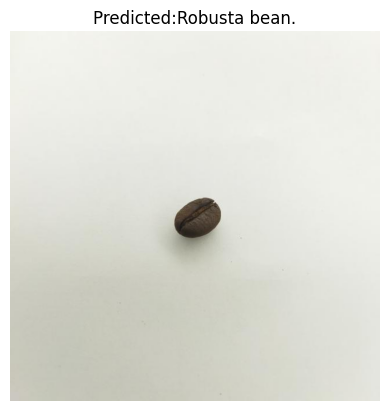

1/1 [==============================] - 0s 302ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_022117_jpg.rf.22ea6e83f27b1078e497e73916f53063.jpg is Arabica bean.
[[0.482432   0.46204782 0.05552014]]


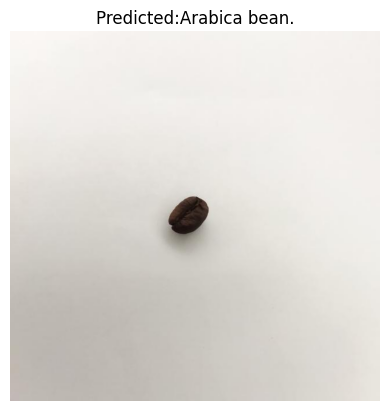

1/1 [==============================] - 0s 253ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_023221_jpg.rf.65e47ddec326bf11ec640bfc948e3263.jpg is Robusta bean.
[[0.15162793 0.83684415 0.01152789]]


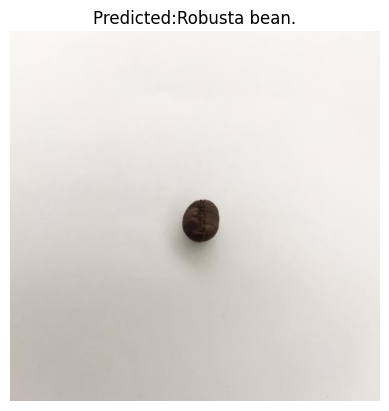

1/1 [==============================] - 0s 226ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_023443_jpg.rf.92d8ae4fb7fbdde9ad4fafcaa4da2026.jpg is Robusta bean.
[[0.17318511 0.812628   0.01418688]]


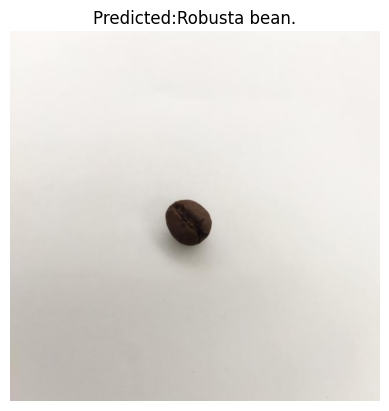

1/1 [==============================] - 0s 267ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_024046_jpg.rf.4b56e350675f834f18cd2fa988e3116e.jpg is Robusta bean.
[[0.36200845 0.6150875  0.02290398]]


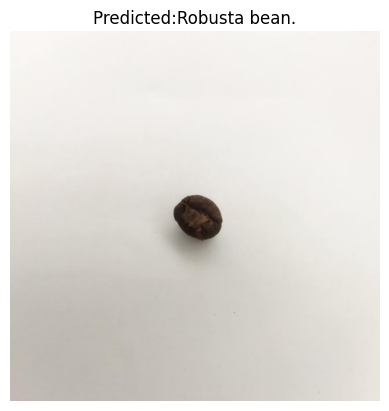

1/1 [==============================] - 0s 266ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_024331_jpg.rf.e378345b7594fee675668cf22a8c5c8d.jpg is Robusta bean.
[[0.20490783 0.78914    0.00595216]]


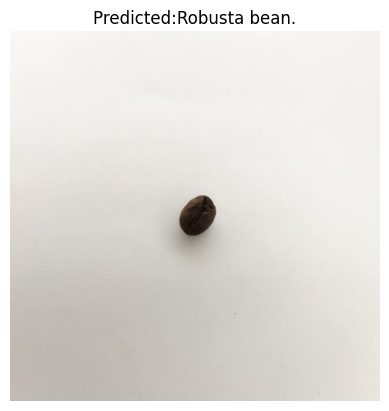

1/1 [==============================] - 0s 254ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_024413_jpg.rf.3473683583cd21d31f4e78c74aa8221d.jpg is Robusta bean.
[[0.28751528 0.6961376  0.01634707]]


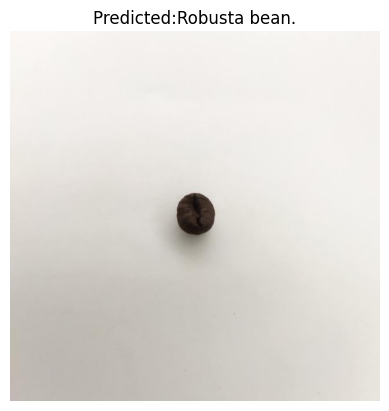

1/1 [==============================] - 0s 266ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230403_024719_jpg.rf.7b08fd0c1df22f5c7c91720dab2c97f8.jpg is Robusta bean.
[[0.36120468 0.6176739  0.02112144]]


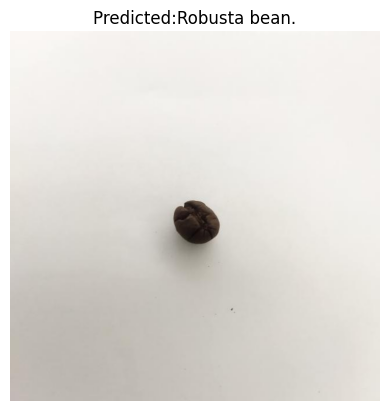

1/1 [==============================] - 0s 299ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_030432_jpg.rf.5508afbde20da8b2e859e2dddfe01f39.jpg is Robusta bean.
[[0.23495534 0.69649655 0.06854816]]


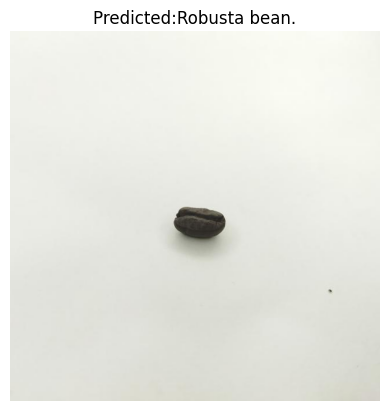

1/1 [==============================] - 0s 292ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_030942_jpg.rf.72e365f6a1d9adea6567a3f1861f435f.jpg is Robusta bean.
[[0.08821874 0.8147041  0.09707716]]


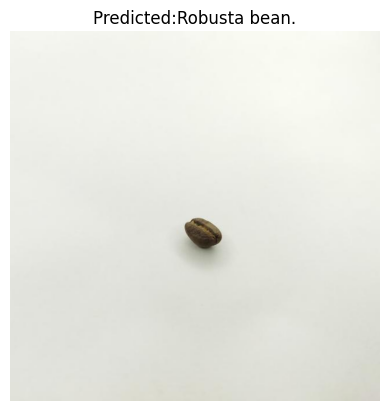

1/1 [==============================] - 0s 277ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_031106_jpg.rf.1c01c0eadfe62524c7bee1f6231677e0.jpg is Robusta bean.
[[0.14500822 0.8264471  0.02854466]]


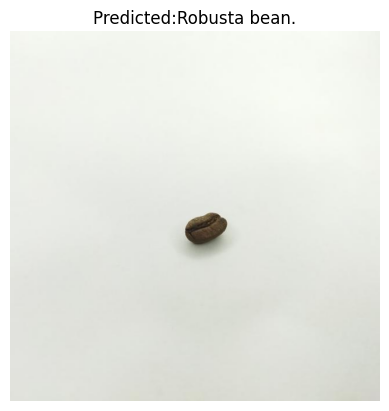

1/1 [==============================] - 0s 323ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_031236_jpg.rf.656635cbc830f596ac73cac995f16d06.jpg is Robusta bean.
[[0.13258177 0.86002374 0.00739444]]


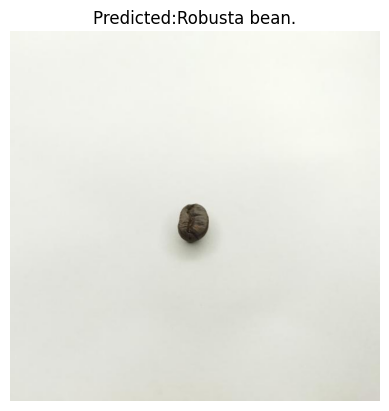

1/1 [==============================] - 0s 260ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_031506_jpg.rf.b604a3399035fb431be15a4c1a96dc91.jpg is Robusta bean.
[[0.04176829 0.94992745 0.00830426]]


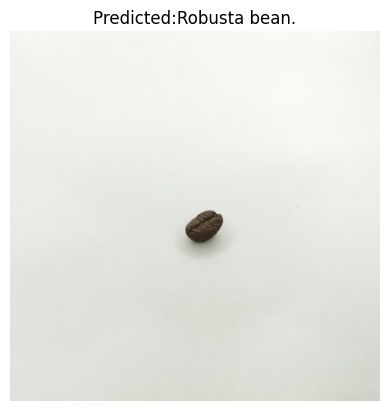

1/1 [==============================] - 0s 246ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_031626_jpg.rf.33cb283721dd50f1cbee6e318a413d9d.jpg is Robusta bean.
[[0.15224859 0.83479434 0.01295712]]


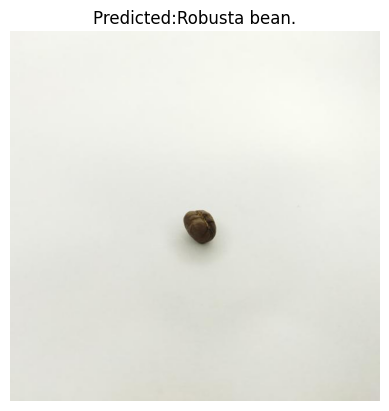

1/1 [==============================] - 0s 276ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_031834_jpg.rf.519141acb40bc4a6010cd5c3e3d8f1e9.jpg is Robusta bean.
[[0.13574629 0.85162365 0.01263003]]


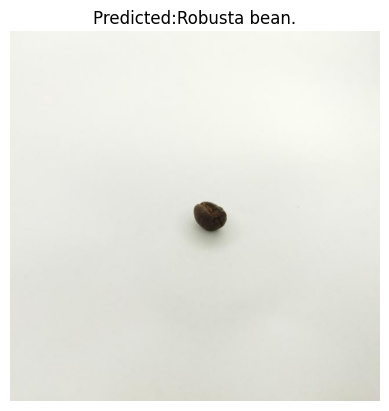

1/1 [==============================] - 0s 244ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_031839_jpg.rf.b8134d7ed4745df6600c67a71dbce66a.jpg is Robusta bean.
[[0.11895745 0.87146616 0.00957642]]


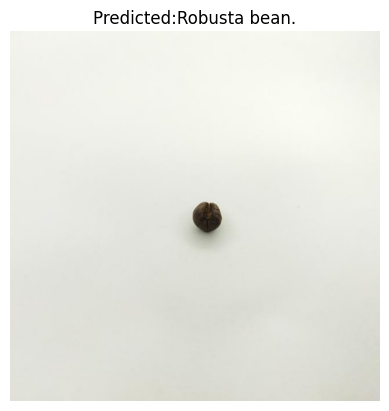

1/1 [==============================] - 0s 231ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_032109_jpg.rf.d27f6805166908d8b2619fc2b5e19edf.jpg is Robusta bean.
[[0.07874937 0.9115678  0.00968281]]


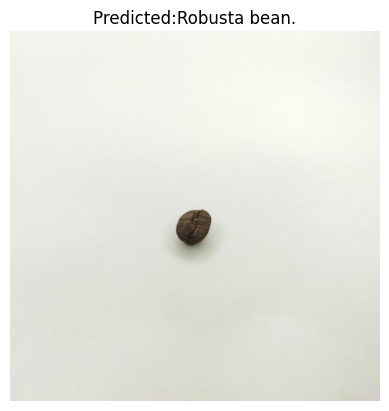

1/1 [==============================] - 0s 276ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_034004_jpg.rf.6dbc1268b882495f5552e00fcdecde1d.jpg is Robusta bean.
[[0.00575875 0.99219525 0.00204598]]


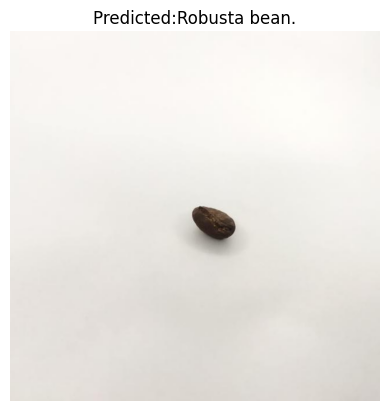

1/1 [==============================] - 0s 279ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_034255_jpg.rf.1ae3f139a97aecea95fde7beceb149e1.jpg is Robusta bean.
[[0.15323536 0.8167326  0.03003216]]


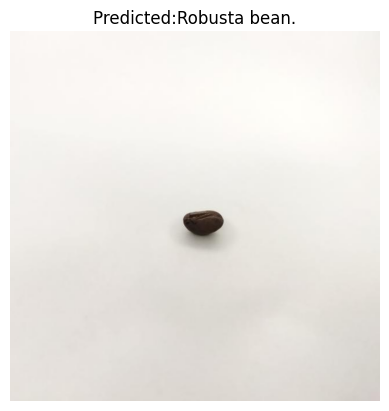

1/1 [==============================] - 0s 253ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_034327_jpg.rf.06e8fb88fef750c3485a70cf2fa501e3.jpg is Robusta bean.
[[0.01098342 0.983328   0.00568853]]


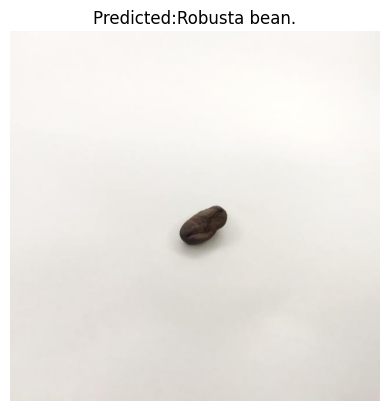

1/1 [==============================] - 0s 272ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_034337_jpg.rf.9ecba0fa9824a2c14d6275f4edb43239.jpg is Robusta bean.
[[0.06018641 0.86060905 0.0792045 ]]


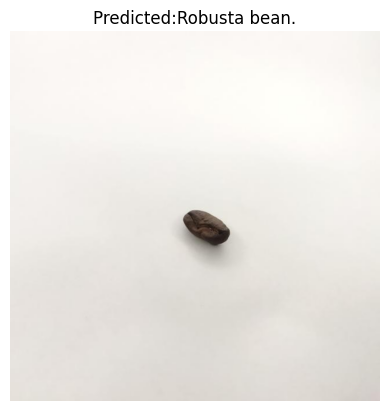

1/1 [==============================] - 0s 343ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_034709_jpg.rf.c9b8e78f3119165d6e1896f67b4dad9f.jpg is Robusta bean.
[[0.0410666  0.9543703  0.00456309]]


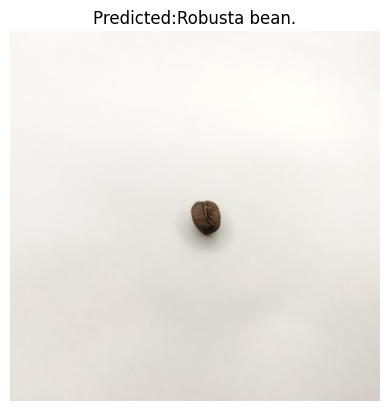

1/1 [==============================] - 0s 293ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_035836_jpg.rf.e76f93787c97197ba05dfb1f1f189a58.jpg is Robusta bean.
[[0.30642813 0.68364894 0.00992288]]


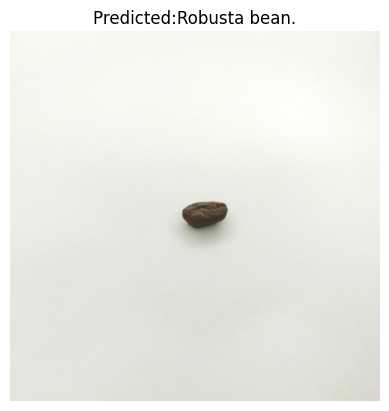

1/1 [==============================] - 0s 245ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_035839_jpg.rf.b13963f22db399adb13e99cdf448cbc7.jpg is Robusta bean.
[[0.23290318 0.71800894 0.04908788]]


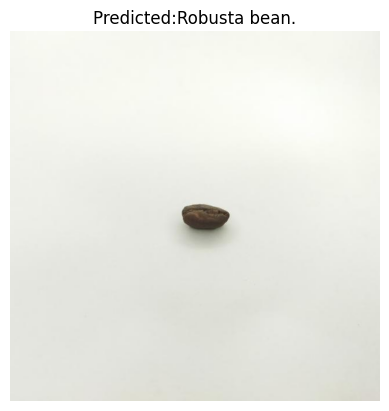

1/1 [==============================] - 0s 267ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_040402_jpg.rf.5196fb21edad2fcb2f93910602e0a534.jpg is Robusta bean.
[[0.17187375 0.8160323  0.012094  ]]


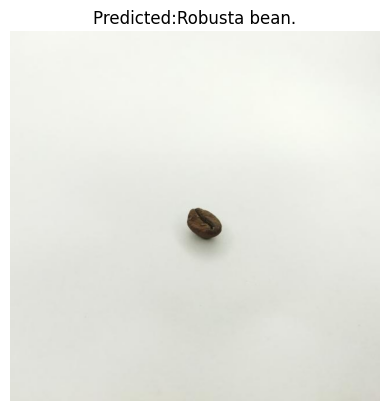

1/1 [==============================] - 0s 264ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_040524_jpg.rf.891f5d7bdade709e334201609df4ce94.jpg is Robusta bean.
[[0.09252279 0.9030965  0.00438065]]


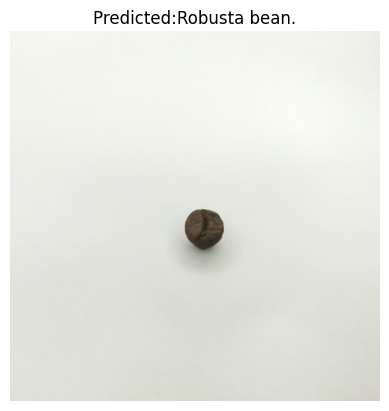

1/1 [==============================] - 0s 267ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_040614_jpg.rf.a122431de932288130d4b51e63084bbd.jpg is Robusta bean.
[[0.05468656 0.9227813  0.02253211]]


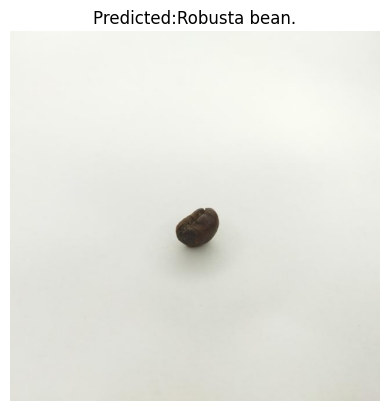

1/1 [==============================] - 0s 257ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_042531_jpg.rf.717c450656c057070eb5ceab7ce3eec8.jpg is Robusta bean.
[[0.22841583 0.7473878  0.02419627]]


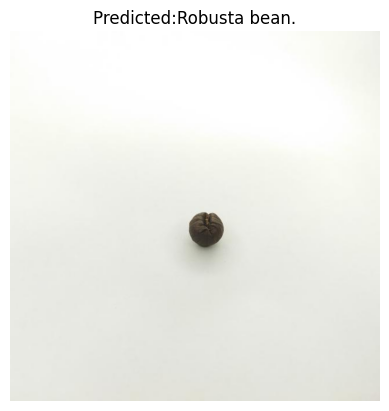

1/1 [==============================] - 0s 244ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_042832_jpg.rf.239d658b76f5d9d49f44e7cdd631ba83.jpg is Robusta bean.
[[0.07470775 0.8982518  0.0270405 ]]


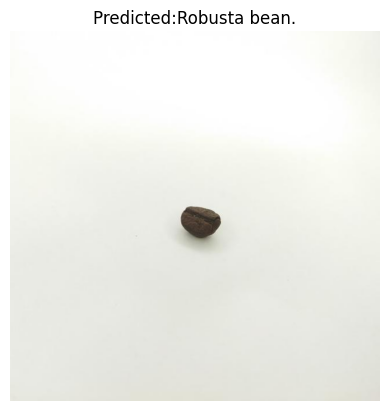

1/1 [==============================] - 0s 229ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_082403_jpg.rf.10061876b315a98a1b2b5dba239fc385.jpg is Robusta bean.
[[0.14689204 0.83775365 0.01535428]]


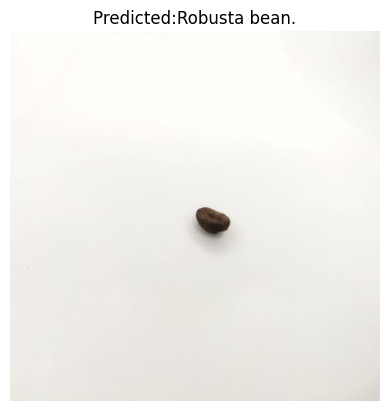

1/1 [==============================] - 0s 241ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_082408_jpg.rf.3cc89c3cbcef646c8f39d58193876f15.jpg is Robusta bean.
[[0.19053769 0.7801082  0.02935413]]


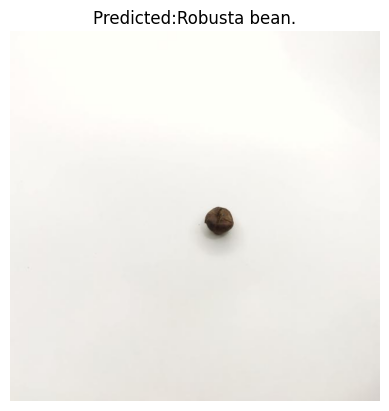

1/1 [==============================] - 0s 284ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_084425_jpg.rf.b82b54515ade006e379ebbfa8d034cae.jpg is Robusta bean.
[[0.29268318 0.6614284  0.04588841]]


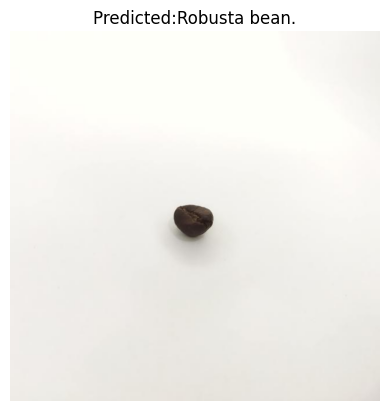

1/1 [==============================] - 0s 302ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_094703_jpg.rf.35ba91505b717202b7a2df9f29a5262f.jpg is Robusta bean.
[[0.13899043 0.84995526 0.01105433]]


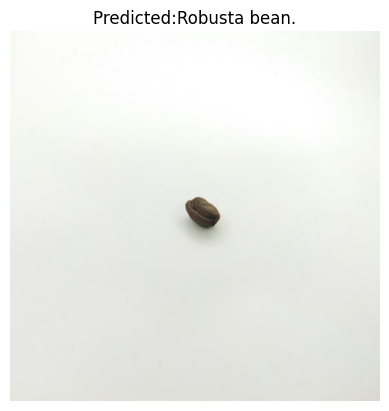

1/1 [==============================] - 0s 242ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_095556_jpg.rf.5ed3217806ffba20774d6e82ca5fae73.jpg is Robusta bean.
[[0.19711857 0.78239554 0.02048585]]


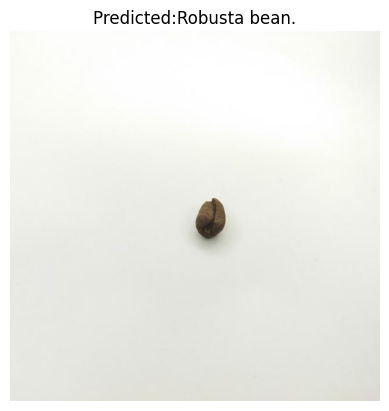

1/1 [==============================] - 0s 290ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_100220_jpg.rf.1a17c61d8c95dc7271680b698d8e4407.jpg is Robusta bean.
[[0.17126828 0.80804294 0.02068873]]


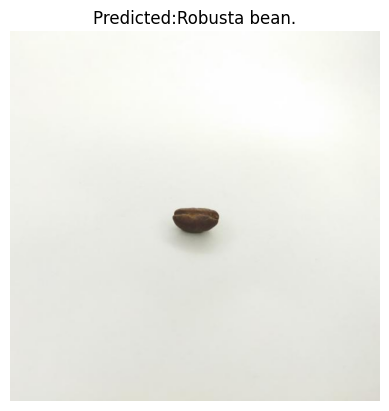

1/1 [==============================] - 0s 251ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_102433_jpg.rf.cb1562d687eaf4ff68d88fe8974faf42.jpg is Robusta bean.
[[0.3152102  0.5919967  0.09279308]]


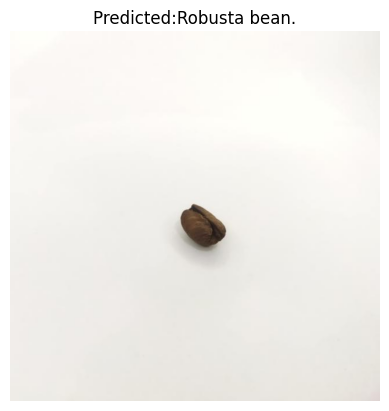

1/1 [==============================] - 0s 270ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_102640_jpg.rf.1f022cdf1dad1af7aef4a6487b6653e5.jpg is Robusta bean.
[[0.21752664 0.7600388  0.02243455]]


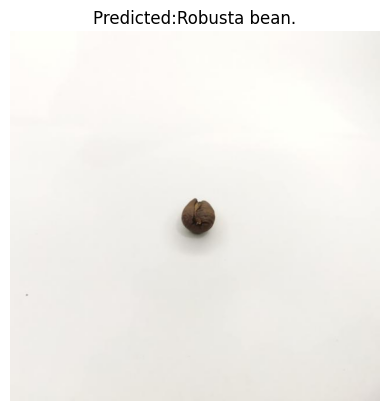

1/1 [==============================] - 0s 231ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_103043_jpg.rf.2177c7bc070fe2e45c7d211a637525a8.jpg is Robusta bean.
[[0.32906136 0.6373949  0.03354381]]


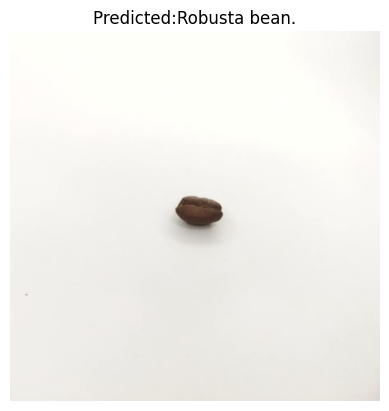

1/1 [==============================] - 0s 235ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_103114_jpg.rf.e21263709ace2347c82ea81a4402e6c3.jpg is Robusta bean.
[[0.33904877 0.621293   0.03965817]]


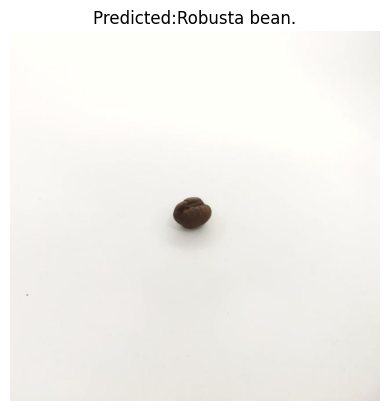

1/1 [==============================] - 0s 230ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_103126_jpg.rf.fcb7a5c65750975440f39e7b0dd2bcc0.jpg is Robusta bean.
[[0.31930563 0.6529306  0.02776374]]


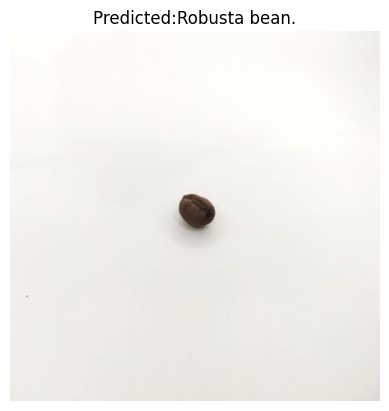

1/1 [==============================] - 0s 228ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_103521_jpg.rf.0c97037520054d742615beac793c1896.jpg is Robusta bean.
[[0.37748712 0.58254945 0.03996338]]


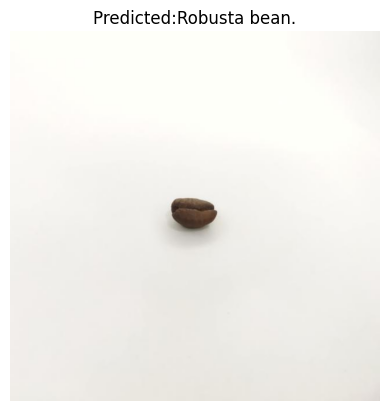

1/1 [==============================] - 0s 233ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_103719_jpg.rf.4b146f60cc0d78a7460ec8cdd829ca7c.jpg is Robusta bean.
[[0.14469689 0.8441648  0.01113831]]


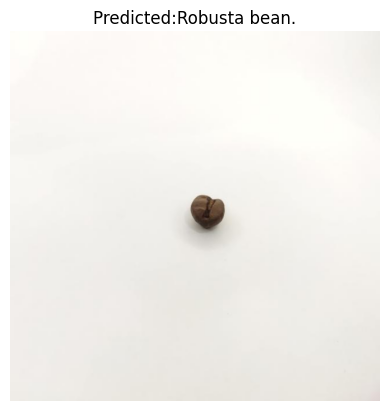

1/1 [==============================] - 0s 270ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230405_103954_jpg.rf.dfd7079b6d76fbb5def8e25d56106927.jpg is Robusta bean.
[[0.2266231  0.7229444  0.05043248]]


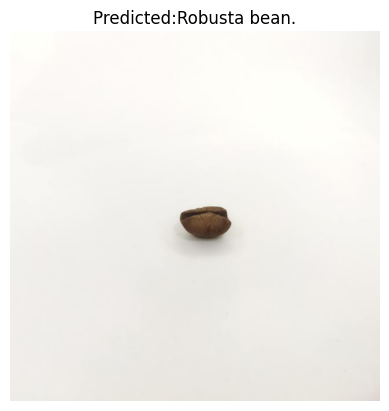

1/1 [==============================] - 0s 225ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_091052_jpg.rf.d12c59542950ffa74a068c51c06eff0c.jpg is Robusta bean.
[[0.02482695 0.96584177 0.00933127]]


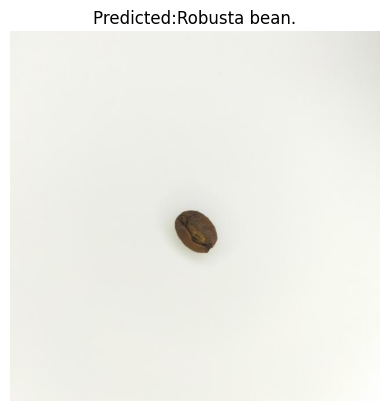

1/1 [==============================] - 0s 253ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_091122_jpg.rf.15557a6934a0ab5a1f61ac1a0cb79391.jpg is Robusta bean.
[[0.07906537 0.9122333  0.00870136]]


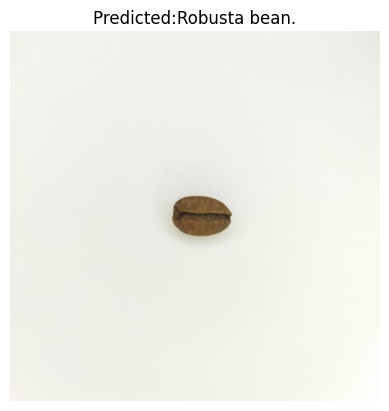

1/1 [==============================] - 0s 226ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_091333_jpg.rf.07da73f7fc9ef47547ca6516058e44fa.jpg is Robusta bean.
[[0.15372688 0.82777566 0.01849751]]


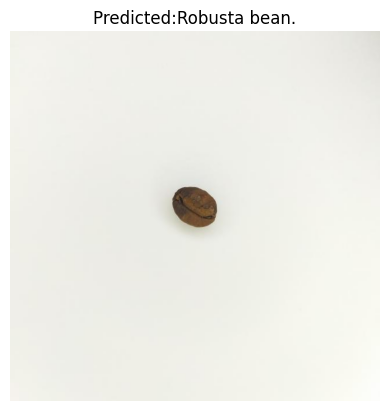

1/1 [==============================] - 0s 284ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_091656_jpg.rf.6c96f7bad15e037142b6ffde0ece1e3b.jpg is Robusta bean.
[[0.00899607 0.9859024  0.0051015 ]]


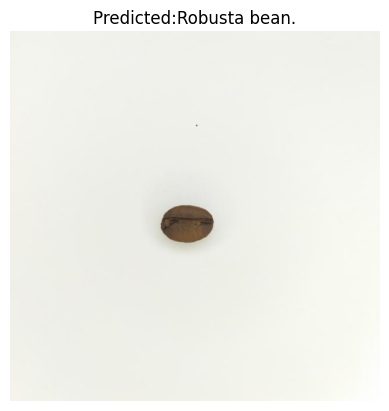

1/1 [==============================] - 0s 234ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_091924_jpg.rf.7b042f04711e379b4808a4a844d82324.jpg is Robusta bean.
[[0.05256697 0.94115543 0.00627762]]


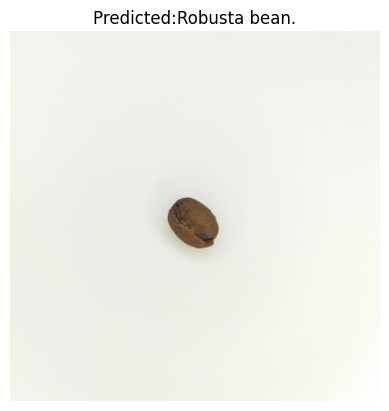

1/1 [==============================] - 0s 255ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_092016_jpg.rf.fe3ca9f0cd20ce716394b2e0736fef80.jpg is Robusta bean.
[[0.01266542 0.9803939  0.00694066]]


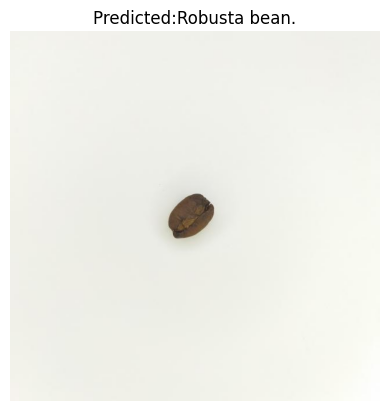

1/1 [==============================] - 0s 250ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_092248_jpg.rf.18f5233faf657d4eafd5c6af4be257bd.jpg is Robusta bean.
[[0.00682923 0.98699665 0.00617414]]


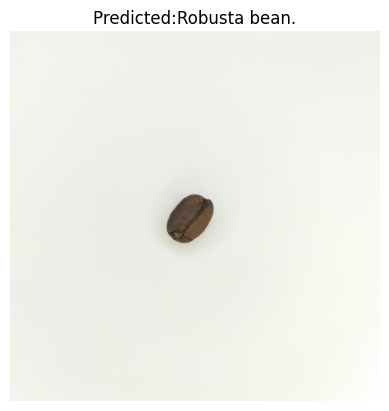

1/1 [==============================] - 0s 239ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_093543_jpg.rf.e0303e30be63128e13ebd9eab9d194f5.jpg is Robusta bean.
[[0.00680291 0.9889837  0.00421342]]


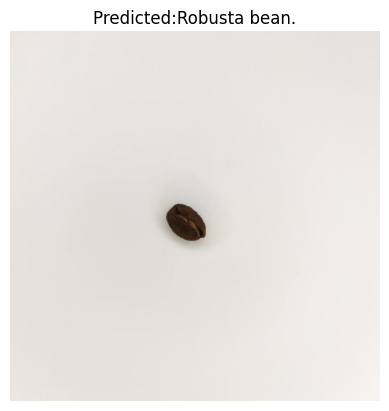

1/1 [==============================] - 0s 228ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_094149_jpg.rf.f8d53fc7126e5174888b6d0e9ecba1bb.jpg is Robusta bean.
[[0.0029846  0.995518   0.00149745]]


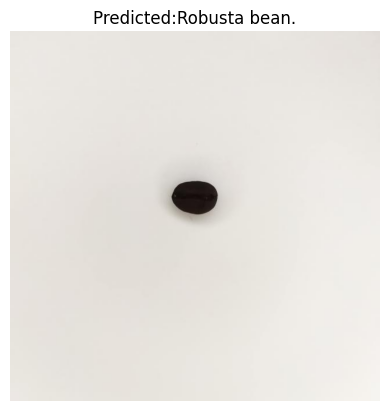

1/1 [==============================] - 0s 316ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_094250_jpg.rf.7fc3abd10843adfb7611728873d07ba2.jpg is Robusta bean.
[[0.00227979 0.995619   0.00210123]]


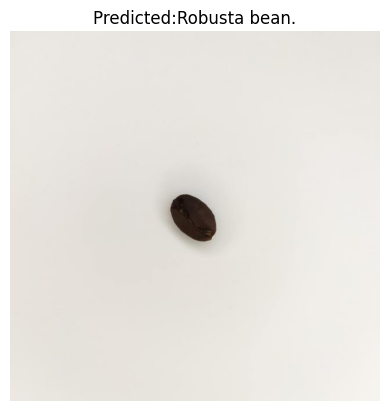

1/1 [==============================] - 0s 248ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_094713_jpg.rf.7193fef6191e4102e14d3c0a83d51923.jpg is Robusta bean.
[[0.01630327 0.9783956  0.00530112]]


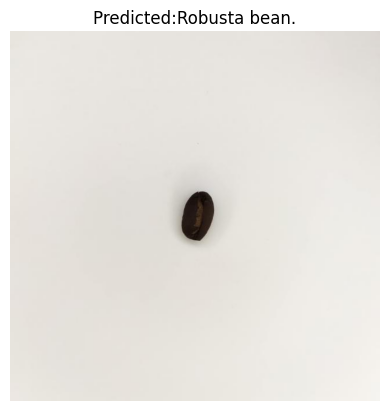

1/1 [==============================] - 0s 223ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_094903_jpg.rf.24a3ef892489bdb14ffd46b80a2700b8.jpg is Robusta bean.
[[0.05113503 0.9152069  0.03365802]]


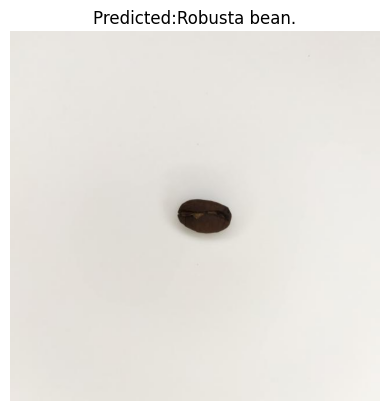

1/1 [==============================] - 0s 320ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_101358_jpg.rf.e487415e6c98b255e36ad3d952042964.jpg is Robusta bean.
[[0.39249244 0.54590803 0.06159953]]


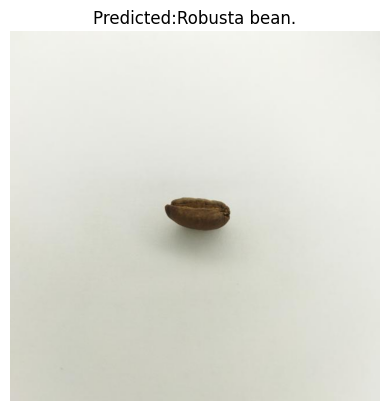

1/1 [==============================] - 0s 311ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_103004_jpg.rf.084016c6dcec5b9f7489855faa12ffc3.jpg is Robusta bean.
[[0.28573957 0.66993755 0.04432292]]


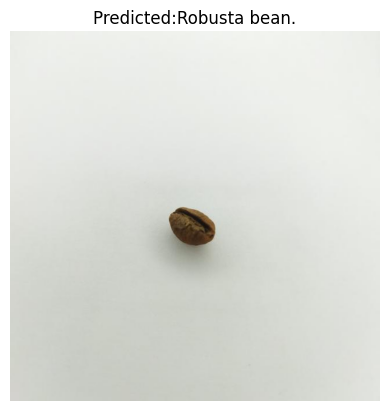

1/1 [==============================] - 0s 236ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_103445_jpg.rf.54a6e9def9f24add9518711023498d78.jpg is Robusta bean.
[[0.00684458 0.98492754 0.00822795]]


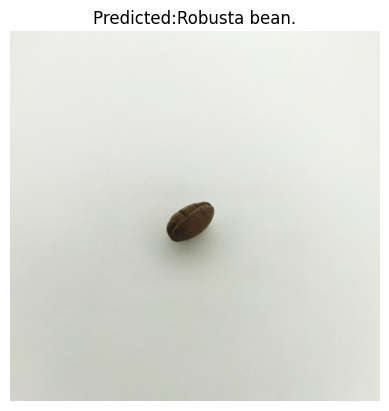

1/1 [==============================] - 0s 246ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_104410_jpg.rf.cb3b57c40694b4111c679222d546d9aa.jpg is Robusta bean.
[[0.26119834 0.7260111  0.01279055]]


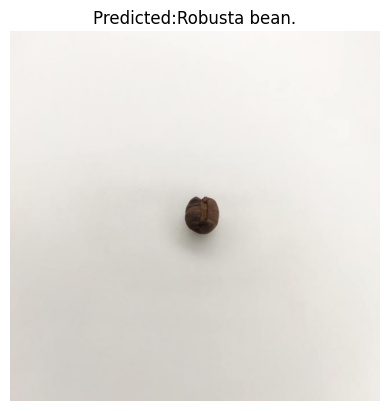

1/1 [==============================] - 0s 289ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_104605_jpg.rf.42815b56043063cf6391d3c738c2717e.jpg is Robusta bean.
[[0.30094832 0.6327339  0.06631781]]


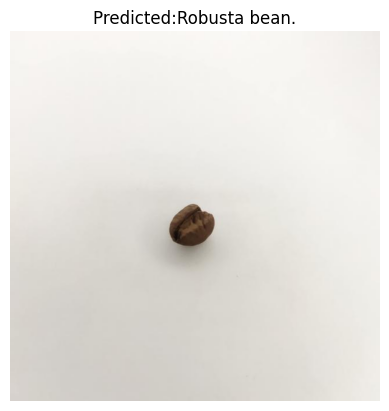

1/1 [==============================] - 0s 231ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_104639_jpg.rf.5f542799b198ad6123cc71af76647dd1.jpg is Robusta bean.
[[0.44015133 0.49409723 0.06575138]]


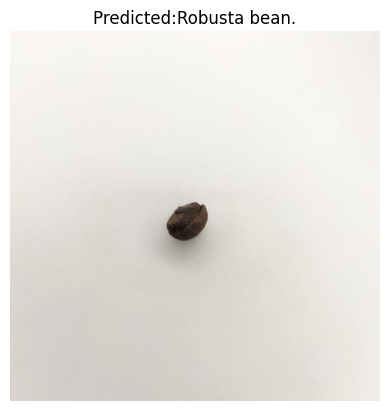

1/1 [==============================] - 0s 238ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_104751_jpg.rf.1cc831acffe5948fadb9ba58a22d89dc.jpg is Robusta bean.
[[0.09124667 0.76290184 0.14585145]]


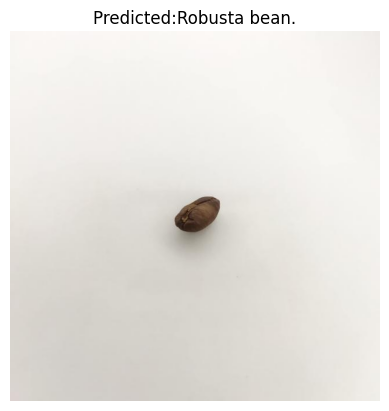

1/1 [==============================] - 0s 259ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_105149_jpg.rf.cd0e49595d1a8728b6610e3655d53654.jpg is Arabica bean.
[[0.51587576 0.4448697  0.03925452]]


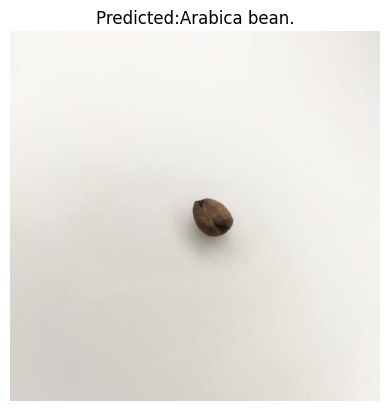

1/1 [==============================] - 0s 230ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_105451_jpg.rf.c06caeb3a16f8bc6ce0ec227318892c9.jpg is Robusta bean.
[[0.23570397 0.7161977  0.04809826]]


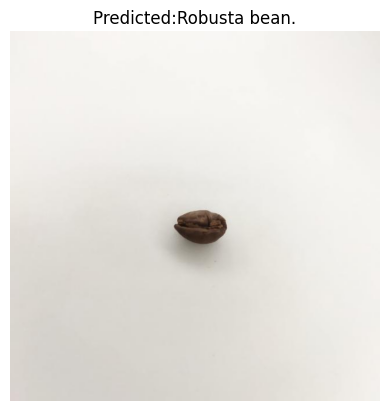

1/1 [==============================] - 0s 220ms/step
C:/Users/__VivoBook__/Downloads/coffee beans detection test.v5i.tensorflow/test/IMG_20230406_105906_jpg.rf.4c05977d0cf8a4d2ee4bcb93b5aa8d11.jpg is Robusta bean.
[[0.4604573  0.49412966 0.04541306]]


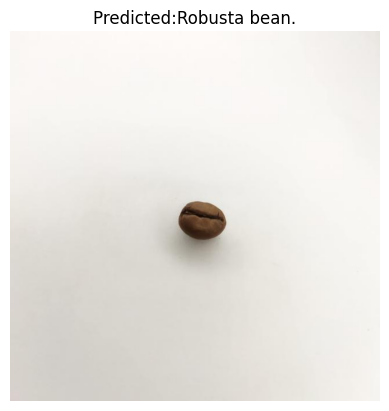

In [4]:
import numpy as np
import os
from tkinter import Tk, filedialog
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

# Assuming you have already loaded and compiled your model

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    return img

# Open a file dialog to select multiple image files
Tk().withdraw()  # Hide the Tkinter main window
image_paths = filedialog.askopenfilenames(title="Select Images")

for image_path in image_paths:
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Make predictions
    predictions = new_model.predict(preprocessed_image)
    predicted_label = np.argmax(predictions)

    # Print the predicted label
    class_names = ['Arabica', 'Robusta', 'Liberica']
    predicted_class = class_names[predicted_label]

    print(f"{image_path} is {predicted_class} bean.")
    print(predictions)
    # Load and display the image
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted:{predicted_class} bean.")
    plt.axis('off')
    plt.show()


In [15]:
import cv2
import numpy as np

img_path = 'test/bean8.jpeg'
img = cv2.imread(img_path)
img = cv2.resize(img, (64, 64))
img = np.expand_dims(img, axis=0)
img = img / 255.0
predictions = new_model.predict(img)
label = 'Good Bean' if predictions[0][0] > 0.8 else 'Bad Bean'
print(predictions)
print(label)


1/1 [==============================] - 0s 41ms/step
[[0.27197158 0.72802836]]
Bad Bean
